# Regression Intro

In [1]:
pip install quandl

In [2]:
import pandas as pd
import quandl

data = quandl.get('WIKI/GOOGL')
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
data = data[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume',]]

In [4]:
data['HL_PERCENTAGE'] = (data['Adj. High'] - data['Adj. Low']) / data['Adj. Low'] * 100.0
data['PERCENTAGE_Change'] = (data['Adj. Close'] - data['Adj. Open']) / data['Adj. Open'] * 100.0

In [5]:
data = data[['Adj. Close', 'HL_PERCENTAGE', 'PERCENTAGE_Change', 'Adj. Volume',]]

In [6]:
data.head()

,Adj. Close,HL_PERCENTAGE,PERCENTAGE_Change,Adj. Volume
Date,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0
2004-08-20,54.322689,8.537313,7.227007,22834300.0
2004-08-23,54.869377,4.062357,-1.227880,18256100.0
2004-08-24,52.597363,7.753210,-5.726357,15247300.0
2004-08-25,53.164113,3.966115,1.183658,9188600.0


# Regression Features and Labels

In [7]:
import math

In [8]:
forecast_col = data['Adj. Close']
data.fillna(-99999, inplace = True)

forecast_out = int(math.ceil(0.01 * len(data)))

In [9]:
data['label'] = forecast_col.shift(-forecast_out)

In [10]:
data.dropna(inplace = True)

In [11]:
data.head()

,Adj. Close,HL_PERCENTAGE,PERCENTAGE_Change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,8.441017,0.324968,44659000.0,69.078238
2004-08-20,54.322689,8.537313,7.227007,22834300.0,67.839414
2004-08-23,54.869377,4.062357,-1.227880,18256100.0,68.912727
2004-08-24,52.597363,7.753210,-5.726357,15247300.0,70.668146
2004-08-25,53.164113,3.966115,1.183658,9188600.0,71.219849


# Regression Training and Testing

In [12]:
import numpy as np
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression

In [13]:
x = np.array(data.drop(['label'], 1))
y = np.array(data['label'])

x = preprocessing.scale(x)

print(len(x), len(y))

3389 3389


In [14]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size = 0.2)

In [15]:
clf = LinearRegression(n_jobs = -1)
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

0.9769407831946252


In [16]:
clf = svm.SVR(kernel = 'sigmoid')
clf.fit(x_train, y_train)

accuracy = clf.score(x_test, y_test)

print(accuracy)

0.9016691890696714


# Regression Forecasting and Predicting

In [26]:
import pickle

In [17]:
x = np.array(data.drop(['label'],1))
y = np.array(data['label'])
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]
x = x[:-forecast_out:]

data.dropna(inplace = True)

print(len(x), len(y))

3354 3389


In [30]:
# clf = LinearRegression(n_jobs = -1)
# clf.fit(x_train, y_train)

# with open('linearregression.pickle', 'wb') as f:
#   pickle.dump(clf, f)

pickle_in = open('linearregression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(x_test, y_test)

In [32]:
forecast_set = clf.predict(x_lately)

print(forecast_set, accuracy, forecast_out)

[1076.27366599 1090.87627668 1104.45479662 1098.50809    1091.86889169
 1089.7924052  1088.55567207 1084.80490979 1078.81279147 1074.3956202
 1072.6837772  1092.76619662 1111.05729451 1115.05682056 1130.13211186
 1134.12697561 1131.86015204 1130.07735937 1131.57215042 1150.61776954
 1148.49168508 1158.56540563 1154.92263873 1163.59459332 1184.38589523
 1196.45697666 1189.42718035 1202.1327885  1206.80744502 1206.20491884
 1197.06762668 1201.83905119 1201.10809938 1136.08048453 1080.28438902] 0.9769407831946252 35


In [20]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

In [21]:
data['Forecast'] = np.nan

In [22]:
last_date = data.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

In [23]:
for i in forecast_set:
  next_date = datetime.datetime.fromtimestamp(next_unix)
  next_unix += one_day
  data.loc[next_date] = [np.nan for _ in range(len(data.columns) - 1)] + [i]

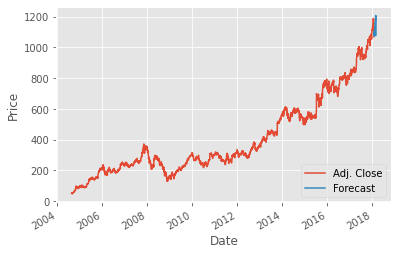

In [33]:
data['Adj. Close'].plot()
data['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# How it Works

1. How to Program Best Fit Slope (m) in y = mx + b